# Find the min distance by length(m)

In [303]:
import pandas as pd
import numpy as np

df = pd.read_csv('tickets_distances_lines.csv')

In [304]:
df.head()

,city_a,formatted_city_a,city_b,formatted_city_b,points,long_regular,category,lat_city_a,long_city_a,lat_city_b,long_city_b,a_lat_long,b_lat_long,duration,length,polyline
0,Brest,"Brest, France",Petrograd,"Saint Petersburg, Russia",20,1,Long,48.390394,-4.486076,59.931058,30.360910,"48.390394,-4.486076","59.9310584,30.3609096",129043,3308569,BGsmwp8Cjm6xIc3BoBvC0UnkBkDzF4D7GsE7BgFjI0FrJg...
1,Lisboa,"Lisbon, Portugal",Danzic,"Gdansk, Poland",20,1,Long,38.722252,-9.139337,54.352025,18.646638,"38.7222524,-9.1393366","54.35202520000001,18.6466384",117227,3323993,BG4vt7pCjt6tRAgK0PrEgPrE0K3DoLzFoLnGwHjDgK3DgP...
2,Palermo,"Palermo, Italy",Moskva,"Moscow, Russia",20,1,Long,38.115690,13.361487,55.755826,37.617300,"38.11569,13.3614868","55.755826,37.6172999",9043,225796,BG83s2oCw0wvZoB4DwH4S8GkS4DsJ4I0U0FsO8BgFoL0Z8...
3,Kobenhavn,"Copenhagen, Denmark",Erzurum,"Erzurum, Turkey",21,1,Long,55.676097,12.568337,39.905499,41.265824,"55.6760968,12.5683372","39.9054993,41.2658236",6088,155728,BGkkmmqDgyi_XwHzFwHrJ0Uvb4IzK4SzU0Z7akI3Isdnfw...
4,Edinburgh,"Edinburgh, Scotland",Athína,"Athens, Greece",21,1,Long,55.953252,-3.188267,37.983810,23.727539,"55.953252,-3.188267","37.9838096,23.7275388",29638,747784,BG8kk3qD1qziGIyBgFsd8GsnBoGsiBgF0eoGokB8B0KoB4...


In [305]:
tickets = df.to_dict('records') 

In [306]:
for ticket in tickets: 
    min_distance = 0 
    if ticket['length'] > 0: 
        min_distance = min_distance 

In [307]:
#figuring out defaultdict
# https://www.geeksforgeeks.org/defaultdict-in-python/


from collections import defaultdict
   
   
# Defining the dict
d = defaultdict(int)
   
L = [1, 2, 3, 4, 2, 4, 1, 2]
   
# Iterate through the list
# for keeping the count
for i in L:
       
    # The default value is 0
    # so there is no need to 
    # enter the key first
    d[i] += 1
       
print(d)

defaultdict(<class 'int'>, {1: 2, 2: 3, 3: 1, 4: 2})


In [308]:
# tickets_df = pd.read_csv(os.path.join(data_dir, 'tickets.csv'))


# connections_df = pd.read_csv(os.path.join(data_dir, 'routes.csv'))
# n_connections = len(connections_df.index)

# n_visited = [0 for _ in range(n_connections)]


tickets_df = pd.read_csv('tickets_latlong.csv')
tickets_df = tickets_df.drop(['city_a', 'city_b', 'points', 'long_regular', 'category'], 1)

connections_df = pd.read_csv('routes.csv')
connections_df.columns = connections_df.columns.str.lower().str.replace(" ", '_')
connections_df = connections_df.drop(['city_a', 'city_b', 'tunnel', 'ferry', 'ferry_count'], 1)


/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_85896/1482868213.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tickets_df = tickets_df.drop(['city_a', 'city_b', 'points', 'long_regular', 'category'], 1)
/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_85896/1482868213.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  connections_df = connections_df.drop(['city_a', 'city_b', 'tunnel', 'ferry', 'ferry_count'], 1)


In [309]:
# setup modules
import os
import pandas as pd
import json
from collections import defaultdict
from pprint import pprint
import sys
import heapq
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [310]:
# loading data and pre-processing
# with open(os.path.join(data_dir, 'city_locations.json'), 'r') as city_file:
#     city_dict = json.load(city_file)
#     # keys = city names, values = [x_pos, y_pos]

cities_df = pd.read_csv('cities_xy.csv', index_col=[2])
cities = cities_df['city_formatted']
# cities = set(city_dict.keys())
n_cities = len(cities)
# n_cities = len(cities)

## [City A, City B, Distance, Color]
# connections_df = pd.read_csv(os.path.join(data_dir, 'routes.csv'))
# n_connections = len(connections_df.index)

connections_df = pd.read_csv('routes.csv')
connections_df.columns = connections_df.columns.str.lower().str.replace(" ", '_')
connections_df = connections_df.drop(['city_a', 'city_b', 'tunnel', 'ferry', 'ferry_count', 'lat_city_a', 'long_city_a','lat_city_b','long_city_b'], 1)
n_connections = len(connections_df.index)


#NOTE: ZERO IDEA HOW THIS IS WORKING !!! 
connections = defaultdict(list)
# keys = cityA, values = (city_2)
for ind, city_A, city_B, dist, col in connections_df.itertuples():
    connections[city_A].append((city_B, dist))
    connections[city_B].append((city_A, dist))

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_85896/2970665140.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  connections_df = connections_df.drop(['city_a', 'city_b', 'tunnel', 'ferry', 'ferry_count', 'lat_city_a', 'long_city_a','lat_city_b','long_city_b'], 1)


In [320]:
distances = dict()

for start in cities:
    distances[start] = dict()
    for city in cities:
        if city == start:
            distances[start][city] = 0
        else:
            distances[start][city] = sys.maxsize

    curr_city = start
    unvisited = distances[start].copy()

    while True:
        del unvisited[curr_city]

        for next_city, distance in connections[curr_city]:
            if next_city in unvisited:
                distances[start][next_city] = min(
                    distances[start][next_city],
                    distances[start][curr_city] + distance)
                unvisited[next_city] = distances[start][next_city]

        if len(unvisited) == 0:
            break

        curr_city = min(unvisited, key=unvisited.get)

In [321]:
cities_df
cities_df = cities_df.set_index('city_formatted')

KeyError: "None of ['city_formatted'] are in the columns"

In [313]:
cities_df = cities_df.drop('city', 1)

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_85896/1664289839.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cities_df = cities_df.drop('city', 1)


In [399]:
tickets_df = pd.read_csv('tickets_latlong.csv')
tickets_df = tickets_df.drop(['city_a', 'city_b', 'points', 'long_regular', 'category'], 1)

n_visited = [0 for _ in range(n_connections)]

for i_ticket, start, end, lat_a, long_a, lat_b, long_b in tickets_df.itertuples():
    costs = defaultdict(set)
    for i_conn, city_A, city_B, dist, col in connections_df.itertuples():
        cost = min(distances[start][city_A] + distances[end][city_B],
                   distances[start][city_B] + distances[end][city_A]) + dist
        costs[cost].add(i_conn)
    
    n_include = 20
    cost_vals = heapq.nsmallest(n_include, costs.keys())
    
    for cost in cost_vals:
        for i_conn in costs[cost]:
            n_visited[i_conn] += 1
    
connections_li = connections_df.values.tolist()
sorted_connections = [connections_li[i] for i in np.argsort(n_visited)]
#print(sorted_connections)

/var/folders/qx/nkh2pq6x3_193757ddxvrcf40000gp/T/ipykernel_85896/394951792.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tickets_df = tickets_df.drop(['city_a', 'city_b', 'points', 'long_regular', 'category'], 1)


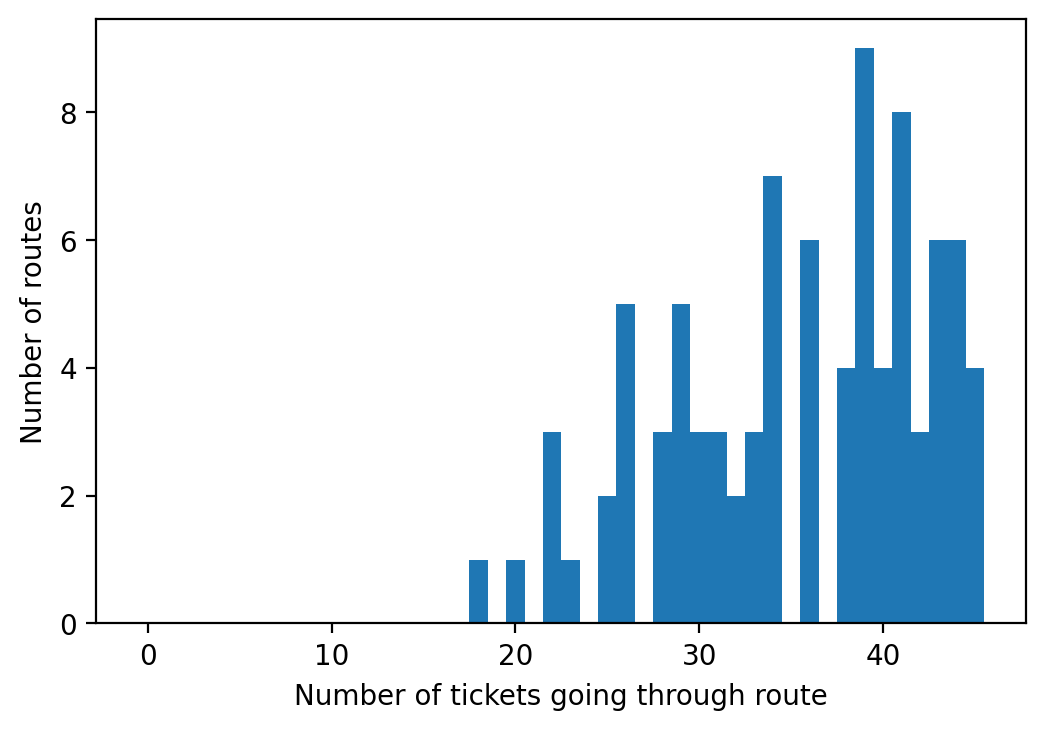

In [400]:
fig, ax = plt.subplots()
mpl.rcParams['figure.dpi'] = 100

ax.hist(n_visited, np.arange(-0.5, max(n_visited) + 0.5))
ax.set_xlabel('Number of tickets going through route')
ax.set_ylabel('Number of routes')

plt.show()

In [401]:
cities_df.dtypes

x_coord    int64
y_coord    int64
dtype: object

In [402]:
#plt.plot([x1*w, x2*w], [h - y1*h, h - y2*h]
type(y1)
cities_df['y_coord'] = cities_df['y_coord'].astype(int)


In [403]:
cities_df['x_coord'] = cities_df['x_coord'].str.replace(',', '')
cities_df['x_coord'] = cities_df['x_coord'].astype(int)


AttributeError: Can only use .str accessor with string values!

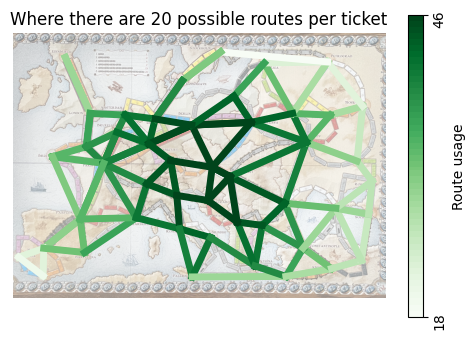

In [404]:
fig, ax = plt.subplots()
mpl.rcParams['figure.dpi'] = 200

# print map image
img = plt.imread(os.path.join('.', 'ticket_to_ride_images', 'europe_board.png'))
#file:///Users/jessieblaeser/Documents/datastudio_spring2022/homework/assignment1/ticket_to_ride_images/europe_board.png
plt.imshow(img, alpha=0.5)
h, w, z = np.shape(img)
plt.axis('off')

min_visited = min(n_visited)
max_visited = max(n_visited)

cmap = plt.cm.get_cmap('Greens', 50)
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=[0, 1],
                    boundaries=np.linspace(0, 1, 100))
cbar.ax.set_yticklabels([str(min_visited), str(max_visited)],
                        rotation='vertical')
cbar.ax.set_ylabel(r'Route usage')

# for ind, city_1, city_2, dist, col in connections_df.itertuples():
#     y1, x1 = cities_df.loc[city_1]
#     y2, x2 = cities_df.loc[city_2]
#     col = cmap((n_visited[ind] - min_visited) / (max_visited - min_visited))
#     plt.plot([x1*w, x2*w], [h - y1*h, h - y2*h],
#              color=col, linewidth=5)

#this plots the green lines
for ind, city_1, city_2, dist, col in connections_df.itertuples():
    y1, x1 = cities_df.loc[city_1]
    y2, x2 = cities_df.loc[city_2]
    col = cmap((n_visited[ind] - min_visited) / (max_visited - min_visited))
    plt.plot([y1, y2], [x1, x2],
             color=col, linewidth=5)
plt.title('Where there are {} possible routes per ticket'.format(n_include))
plt.savefig(os.path.join('.', 'plots',
                         'heat_map_{}_shortest.png'.format(n_include)))

plt.show()



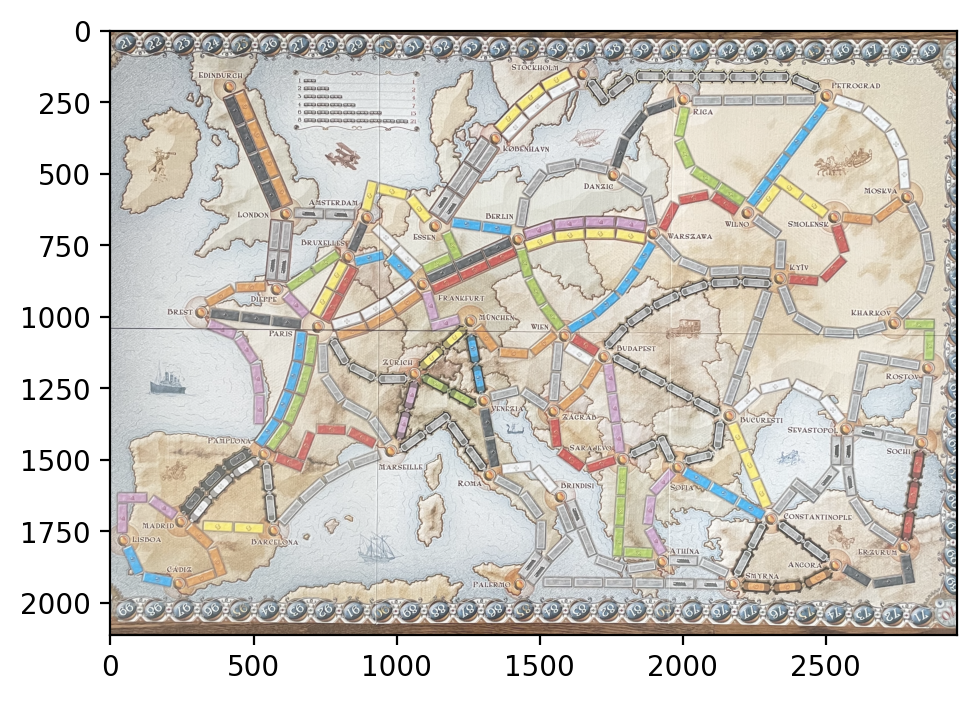

In [351]:
img = plt.imread(os.path.join('.', 'ticket_to_ride_images', 'europe_board.png'))
#file:///Users/jessieblaeser/Documents/datastudio_spring2022/homework/assignment1/ticket_to_ride_images/europe_board.png
plt.imshow(img, alpha=0.8)
h, w, z = np.shape(img)
#img = plt.axis('off')


In [ ]:
for i_ticket, start, end, lat_a, long_a, lat_b, long_b in tickets_df.itertuples():
    costs = defaultdict(set)
    for i_conn, city_A, city_B, dist, col in connections_df.itertuples():
        cost = min(distances[start][city_A] + distances[end][city_B],
                   distances[start][city_B] + distances[end][city_A]) + dist
        costs[cost].add(i_conn)
    
#     n_include = 10
#     cost_vals = heapq.nsmallest(n_include, costs.keys())
    
#     for cost in cost_vals:
#         for i_conn in costs[cost]:
#             n_visited[i_conn] += 1
    
# connections_li = connections_df.values.tolist()
# sorted_connections = [connections_li[i] for i in np.argsort(n_visited)]
# # pprint(sorted_connections)

### Everything below is an attempt to create on csv with unique cities and keeping lat long info 

In [74]:
# # Find the unique values in multiple columns using numpy.unique()
# df2 = np.unique(connections_df[['city_a_formatted', 'city_b_formatted']].values)
# len(df2)

# # Use numpy.unique() to unique values in multiple columns 
# column_values = connections_df[['city_a_formatted', 'city_b_formatted']].values
# df2 = np.unique(column_values)

# # Using Set() in pandas DataFrame
# df2 = set(connections_df['city_a_formatted'].append(connections_df['color']).values)


# # Using pandas.concat to extend one column to multiple columns
# df2 = pd.concat([connections_df['city_a_formatted'],connections_df['city_b_formatted'],connections_df['distance'],connections_df['color']]).unique()
# df2
# # # Use Series.drop_duplicates() to get unique values
# # connections_df(connections_df[['city_a_formatted'], ['city_b_formatted']]).drop_duplicates()


# connections_df['city_a_formatted'].unique()
# df2 = pd.unique(connections_df[['city_a_formatted', 'distance']].values.ravel())
# df2

# column_values = connections_df[['city_a_formatted', 'city_b_formatted']].values
# df2 = np.unique(column_values)
# df2


In [76]:
#print(connections_df['city_a_formatted'].unique())


NameError: name 'distances' is not defined

In [162]:
<!-- Image Map Generated by http://www.image-map.net/ -->
<img src="europe_board.png" usemap="#image-map">

<map name="image-map">
    <area target="" alt="Lisbon, Portugal " title="Lisbon, Portugal " href="" coords="48,1782,NaN" shape="circle">
    <area target="" alt="Cadiz, Spain" title="Cadiz, Spain" href="" coords="242,1931,NaN" shape="circle">
    <area target="" alt="Madrid, Spain" title="Madrid, Spain" href="" coords="247,1711,NaN" shape="circle">
    <area target="" alt="Barcelona, Spain" title="Barcelona, Spain" href="" coords="571,1745,NaN" shape="circle">
    <area target="" alt="Pamplona, Spain" title="Pamplona, Spain" href="" coords="537,1479,NaN" shape="circle">
</map>

SyntaxError: invalid syntax (4067706575.py, line 1)